### DNA EDA

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Read the data into a DataFrame
dna_data = pd.read_csv("DNA_sequences.txt")

In [3]:
dna_data

>AT1G22840.1_532|1|training
0    AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...
1                          >AT1G44000.1_976|1|training
2    GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...
3                         >AT1G09770.1_2698|1|training
4    ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...
..                                                 ...
594  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...
595                        >AT5G32481.1_4454|0|testing
596  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...
597                         >AT5G59305.1_468|0|testing
598  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...

[599 rows x 1 columns]

In [4]:
# Display the head of the DataFrame
print("Head of the DataFrame:")
print(dna_data.head())
print()

Head of the DataFrame:
                         >AT1G22840.1_532|1|training
0  AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...
1                        >AT1G44000.1_976|1|training
2  GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...
3                       >AT1G09770.1_2698|1|training
4  ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...



In [5]:
# Display the tail of the DataFrame
print("Tail of the DataFrame:")
print(dna_data.tail())
print()

Tail of the DataFrame:
                           >AT1G22840.1_532|1|training
594  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...
595                        >AT5G32481.1_4454|0|testing
596  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...
597                         >AT5G59305.1_468|0|testing
598  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...



In [6]:
# Display basic statistics of the DataFrame
print("Description of the DataFrame:")
print(dna_data.describe())
print()

Description of the DataFrame:
                              >AT1G22840.1_532|1|training
count                                                 599
unique                                                599
top     AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...
freq                                                    1



In [7]:
# Display data types of each column
print("Data types of each column:")
print(dna_data.dtypes)
print()

Data types of each column:
>AT1G22840.1_532|1|training    object
dtype: object



In [8]:
dna_data.shape

(599, 1)

In [9]:
dna_data.columns.tolist()

['>AT1G22840.1_532|1|training']

In [10]:
dna_data.nunique()

>AT1G22840.1_532|1|training    599
dtype: int64

In [11]:
# Display unique values in each column
print("Unique values in each column:")
for column in dna_data.columns:
    unique_values = dna_data[column].unique()
    print(f"{column}: {unique_values}")
print()

Unique values in each column:
>AT1G22840.1_532|1|training: ['AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATCTCAAACTTTTTTTGTTTATCATCAATTACGTTCTTGGTGGGAATTTGGCTGTAAT'
 '>AT1G44000.1_976|1|training'
 'GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTGTGAGACAAAGTTGTACATTCTCCTGTGTTTTTTTTTGCAAATGATGTAGATTTCT'
 '>AT1G09770.1_2698|1|training'
 'ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCATAAAAACTTGAGTTTTGTATTGCTTACAAGTTTTAAGGAGACGTAGCTTGACTTTG'
 '>AT1G09645.1_586|1|training'
 'ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGGTGGAACTTATCACTTATGGGTATTTAAATTTGAAGTATATATATACGCATACTTT'
 '>AT1G22850.1_1097|1|training'
 'ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTAGGAAACAAGCCAGCGATTGGATAATGGTTTTGACTCTCTAGGATTTGTAAAACGC'
 '>AT1G74960.2_2112|1|training'
 'GAGCTAAGCTAAGTTTCTTAGGATCAAGATCTGATGAGCCAAAGACTTGGACAGGAGCTAAAACGTGCTAGAGATATCAGAGTTTGGATTCGCCATTAAAA'
 '>AT1G77440.1_812|1|training'
 'CCGGTTATGTAGAAGCTCTCGTCCCATAGTAACTATGTTCCTTCTCTGAAACTGGATATTGTGGTTCGTTCTCTCGGATGTTTTATTTGCTATTGATAGAG'
 '>AT1G43900.1_11

In [12]:
# Check for null values
print("Null values in the DataFrame:")
print(dna_data.isnull().sum())
print()

Null values in the DataFrame:
>AT1G22840.1_532|1|training    0
dtype: int64



#  Data Cleaning

In [13]:
import pandas as pd
import re

# Read the data from the file
with open("DNA_sequences.txt", "r") as file:
    data = file.readlines()
    print(data)

# Combine the lines into a single string
combined_data = "".join(data)
print(combined_data)

['>AT1G22840.1_532|1|training\n', 'AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATCTCAAACTTTTTTTGTTTATCATCAATTACGTTCTTGGTGGGAATTTGGCTGTAAT\n', '>AT1G44000.1_976|1|training\n', 'GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTGTGAGACAAAGTTGTACATTCTCCTGTGTTTTTTTTTGCAAATGATGTAGATTTCT\n', '>AT1G09770.1_2698|1|training\n', 'ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCATAAAAACTTGAGTTTTGTATTGCTTACAAGTTTTAAGGAGACGTAGCTTGACTTTG\n', '>AT1G09645.1_586|1|training\n', 'ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGGTGGAACTTATCACTTATGGGTATTTAAATTTGAAGTATATATATACGCATACTTT\n', '>AT1G22850.1_1097|1|training\n', 'ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTAGGAAACAAGCCAGCGATTGGATAATGGTTTTGACTCTCTAGGATTTGTAAAACGC\n', '>AT1G74960.2_2112|1|training\n', 'GAGCTAAGCTAAGTTTCTTAGGATCAAGATCTGATGAGCCAAAGACTTGGACAGGAGCTAAAACGTGCTAGAGATATCAGAGTTTGGATTCGCCATTAAAA\n', '>AT1G77440.1_812|1|training\n', 'CCGGTTATGTAGAAGCTCTCGTCCCATAGTAACTATGTTCCTTCTCTGAAACTGGATATTGTGGTTCGTTCTCTCGGATGTTTTATTTGCTATTGATAGAG\n', '>AT1G43900.1_11

In [14]:
new_data = combined_data.split(">")

geneID = []
label = []
train_test = []
sequence = []

for i in range(len(new_data)):
    data_temp = new_data[i]
    if(data_temp)!="":
        geneID.append(data_temp.split("|")[0])
        label.append(int(data_temp.split("|")[1]))
        train_test.append(data_temp.split("|")[2].split("\n")[0])
        sequence.append(data_temp.split("|")[2].split("\n")[1])

In [15]:
import pandas as pd

# Assuming your data is stored in lists geneID, label, train_test, and sequence

# Combine the lists into a dictionary
data_dict = {
    "GeneID": geneID,
    "Label": label,
    "Train_Test": train_test,
    "Sequence": sequence
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Display the DataFrame
print(df)


               GeneID  Label Train_Test  \
0     AT1G22840.1_532      1   training   
1     AT1G44000.1_976      1   training   
2    AT1G09770.1_2698      1   training   
3     AT1G09645.1_586      1   training   
4    AT1G22850.1_1097      1   training   
..                ...    ...        ...   
295   AT5G22920.1_138      0    testing   
296   AT5G12960.1_581      0    testing   
297   AT5G11230.1_249      0    testing   
298  AT5G32481.1_4454      0    testing   
299   AT5G59305.1_468      0    testing   

                                              Sequence  
0    AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...  
1    GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...  
2    ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...  
3    ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGG...  
4    ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTA...  
..                                                 ...  
295  AACAAATTTTGATATCTGATTGGTGTTGATTCCAAGTAAGAAAGAT...  
296  AAAGAAGCTGGTCTTAATGCTC

In [16]:
df.drop(columns=["GeneID"], inplace=True)

In [17]:
df

Label Train_Test                                           Sequence
0        1   training  AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...
1        1   training  GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...
2        1   training  ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...
3        1   training  ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGG...
4        1   training  ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTA...
..     ...        ...                                                ...
295      0    testing  AACAAATTTTGATATCTGATTGGTGTTGATTCCAAGTAAGAAAGAT...
296      0    testing  AAAGAAGCTGGTCTTAATGCTCCTGGAGTTCCCTATGGAGGATGGG...
297      0    testing  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...
298      0    testing  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...
299      0    testing  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...

[300 rows x 3 columns]

# BAR PLOT

In [18]:
# Function for creating Data Quality Report for Continuous Variables
def dq_report_continuous(df, feature, description):
    data = df[feature]
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Min.": data.min(),
        "Q1": data.quantile(0.25),
        "Median": data.median(),
        "Q3": data.quantile(0.75),
        "Max.": data.max(),
        "Mean": data.mean(),
        "Std. Dev.": data.std()
    }
    return report


# Function for creating Data Quality Report for Categorical Variables
def dq_report_categorical(df, feature, description):
    data = df[feature]
    mode = data.mode()[0]
    mode_freq = data.value_counts()[mode]
    second_mode = data.value_counts().index[1] if len(data.value_counts()) > 1 else None
    second_mode_freq = data.value_counts()[second_mode] if second_mode is not None else None
    
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Mode": mode,
        "Mode Freq.": mode_freq,
        "Mode %": (mode_freq / len(data)) * 100,
        "2nd Mode": second_mode,
        "2nd Mode Freq.": second_mode_freq,
        "2nd Mode Perc": (second_mode_freq / len(data)) * 100 if second_mode_freq is not None else None
    }
    return report


In [19]:
# Creating Data Quality Reports for All Categorical Variables
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

categorical_reports = []
for col in categorical_columns:
    #description = features_df.loc[features_df['col_name'] == col, 'desc'].values[0]
    report = dq_report_categorical(df, col, "see col name")
    categorical_reports.append(report)

#presents the list of reports as a DataFrame
categorical_reports_df = pd.DataFrame(categorical_reports)

In [20]:
categorical_reports_df

Feature         Desc.  Count  % of Missing  Card.  \
0  Train_Test  see col name    300           0.0      2   
1    Sequence  see col name    300           0.0    300   

                                                Mode  Mode Freq.     Mode %  \
0                                           training         200  66.666667   
1  ------------------------------------ATTTGGGAGA...           1   0.333333   

                                            2nd Mode  2nd Mode Freq.  \
0                                            testing             100   
1  TTACATGAAAGTCCCGGAGACTAAAGGCATGCCTTTGGAAGTTATC...               1   

   2nd Mode Perc  
0      33.333333  
1       0.333333

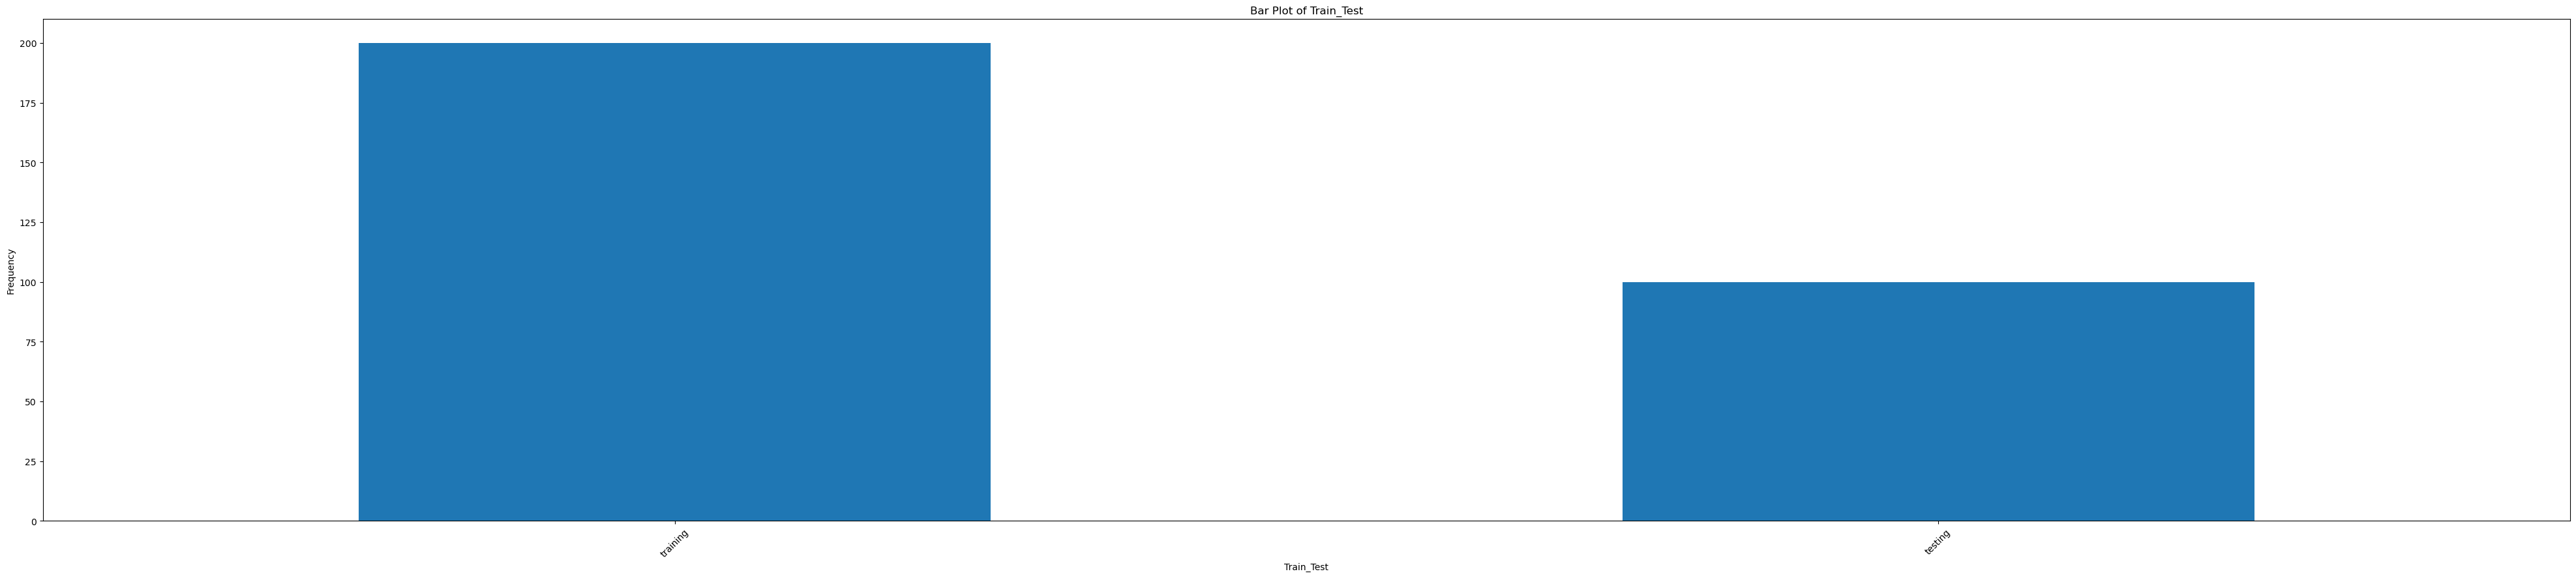

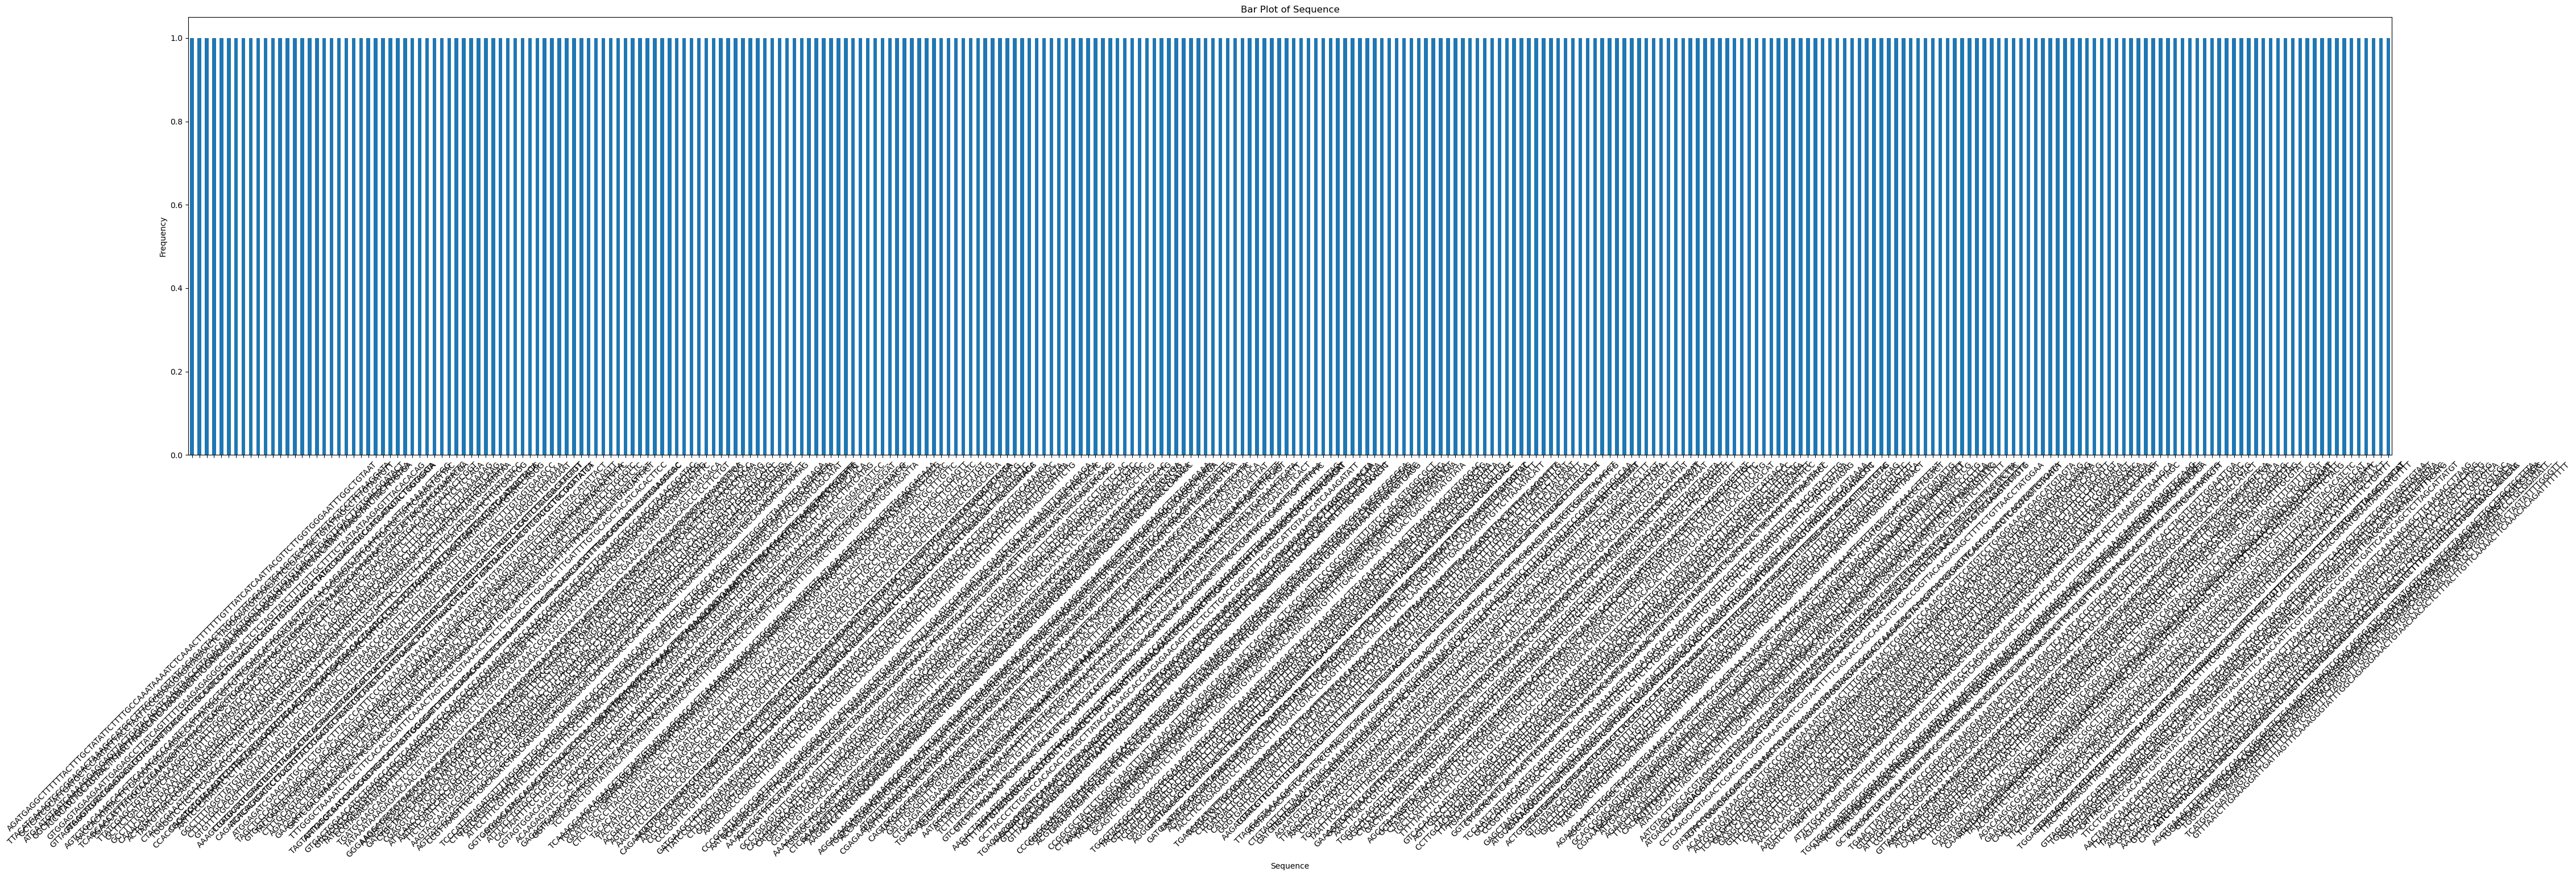

In [21]:
# bar plots
# Plotting bar plots for all categorical variables
import matplotlib.pyplot as plt
for col in categorical_columns:
    plt.figure(figsize=(50, 10))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

# One hot encoding

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your data
#data = pd.read_csv("your_data.csv")

# Convert sequence column to list of lists of characters
sequences = [list(seq) for seq in df['Sequence']]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform on the sequences
sequences_encoded = encoder.fit_transform(sequences)

# Get the feature names for the encoded sequences
feature_names = [f'base_{i}' for i in range(sequences_encoded.shape[1])]

# Convert the encoded arrays back to DataFrame
encoded_df = pd.DataFrame(sequences_encoded, columns=feature_names)

# Concatenate the encoded DataFrame with the original data
encoded_data = pd.concat([df, encoded_df], axis=1)

# Drop the original sequence column if needed
encoded_data.drop('Sequence', axis=1, inplace=True)

# Print the first few rows of the encoded data
print(encoded_data.head())


   Label Train_Test  base_0  base_1  base_2  base_3  base_4  base_5  base_6  \
0      1   training       0       1       0       0       0       0       0   
1      1   training       0       0       0       1       0       0       1   
2      1   training       0       1       0       0       0       0       0   
3      1   training       0       1       0       0       0       0       0   
4      1   training       0       1       0       0       0       0       0   

   base_7  ...  base_448  base_449  base_450  base_451  base_452  base_453  \
0       0  ...         0         1         0         0         0         0   
1       0  ...         0         0         1         0         0         0   
2       1  ...         0         0         0         0         1         0   
3       1  ...         0         0         0         0         1         0   
4       0  ...         0         0         0         1         0         0   

   base_454  base_455  base_456  base_457  
0         0 

C:\Users\the_dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
encoded_data.head()

Label Train_Test  base_0  base_1  base_2  base_3  base_4  base_5  base_6  \
0      1   training       0       1       0       0       0       0       0   
1      1   training       0       0       0       1       0       0       1   
2      1   training       0       1       0       0       0       0       0   
3      1   training       0       1       0       0       0       0       0   
4      1   training       0       1       0       0       0       0       0   

   base_7  ...  base_448  base_449  base_450  base_451  base_452  base_453  \
0       0  ...         0         1         0         0         0         0   
1       0  ...         0         0         1         0         0         0   
2       1  ...         0         0         0         0         1         0   
3       1  ...         0         0         0         0         1         0   
4       0  ...         0         0         0         1         0         0   

   base_454  base_455  base_456  base_457  
0         0         0         0         1  
1         0         0         0         1  
2         0         0         1         0  
3         0         0         0         1  
4         0         1         0         0  

[5 rows x 460 columns]

# correct split

In [24]:

# Splitting the dataset based on 'train_test' column
train_data = encoded_data[encoded_data['Train_Test'] == 'training']
test_data = encoded_data[encoded_data['Train_Test'] == 'testing']

# Separating features and target
X_train = train_data.drop(['Label', 'Train_Test'], axis=1)
y_train = train_data['Label']
X_test = test_data.drop(['Label', 'Train_Test'], axis=1)
y_test = test_data['Label']

# Shapes of the split data (for verification)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(200, 458) (200,) (100, 458) (100,)


In [25]:
X_train

base_0  base_1  base_2  base_3  base_4  base_5  base_6  base_7  base_8  \
0         0       1       0       0       0       0       0       0       1   
1         0       0       0       1       0       0       1       0       0   
2         0       1       0       0       0       0       0       1       0   
3         0       1       0       0       0       0       0       1       0   
4         0       1       0       0       0       0       0       0       0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
195       0       0       0       0       1       0       0       1       0   
196       0       1       0       0       0       0       1       0       0   
197       0       1       0       0       0       0       0       0       1   
198       0       1       0       0       0       0       0       0       0   
199       0       0       0       1       0       0       0       0       0   

     base_9  ...  base_448  base_449  base_450  base_451  base_452  base_453  \
0         0  ...         0         1         0         0         0         0   
1         0  ...         0         0         1         0         0         0   
2         0  ...         0         0         0         0         1         0   
3         0  ...         0         0         0         0         1         0   
4         1  ...         0         0         0         1         0         0   
..      ...  ...       ...       ...       ...       ...       ...       ...   
195       0  ...         0         0         0         0         1         0   
196       0  ...         0         1         0         0         0         0   
197       0  ...         0         0         0         1         0         0   
198       1  ...         0         0         0         1         0         0   
199       1  ...         0         0         0         0         1         0   

     base_454  base_455  base_456  base_457  
0           0         0         0         1  
1           0         0         0         1  
2           0         0         1         0  
3           0         0         0         1  
4           0         1         0         0  
..        ...       ...       ...       ...  
195         0         1         0         0  
196         0         1         0         0  
197         0         0         1         0  
198         1         0         0         0  
199         1         0         0         0  

[200 rows x 458 columns]

In [26]:
X_test

base_0  base_1  base_2  base_3  base_4  base_5  base_6  base_7  base_8  \
200       0       0       0       1       0       0       0       0       0   
201       0       0       0       0       1       0       0       1       0   
202       0       0       0       1       0       0       0       0       1   
203       0       1       0       0       0       0       0       0       0   
204       0       0       0       1       0       0       0       1       0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
295       0       1       0       0       0       0       1       0       0   
296       0       1       0       0       0       0       1       0       0   
297       0       0       0       0       1       0       0       1       0   
298       0       1       0       0       0       0       1       0       0   
299       0       0       0       0       1       0       1       0       0   

     base_9  ...  base_448  base_449  base_450  base_451  base_452  base_453  \
200       1  ...         0         1         0         0         0         0   
201       0  ...         0         0         0         1         0         0   
202       0  ...         0         1         0         0         0         0   
203       1  ...         0         0         1         0         0         0   
204       0  ...         0         0         0         0         1         0   
..      ...  ...       ...       ...       ...       ...       ...       ...   
295       0  ...         0         1         0         0         0         0   
296       0  ...         0         1         0         0         0         0   
297       0  ...         0         0         0         0         1         0   
298       0  ...         0         0         1         0         0         0   
299       0  ...         1         0         0         0         0         1   

     base_454  base_455  base_456  base_457  
200         0         0         1         0  
201         1         0         0         0  
202         1         0         0         0  
203         0         0         0         1  
204         0         0         0         1  
..        ...       ...       ...       ...  
295         0         0         1         0  
296         0         1         0         0  
297         0         1         0         0  
298         1         0         0         0  
299         0         0         0         0  

[100 rows x 458 columns]

In [27]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: Label, Length: 200, dtype: int64

In [28]:
y_test

200    1
201    1
202    1
203    1
204    1
      ..
295    0
296    0
297    0
298    0
299    0
Name: Label, Length: 100, dtype: int64

### OneHot models and Performance

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True)),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression())
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if hasattr(clf, "predict_proba") else 0

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


K-Nearest Neighbors Performance:
Accuracy: 0.7400, Precision: 0.7435, Recall: 0.7400, F1 Score: 0.7391, Weighted F1: 0.7391, ROC AUC: 0.7856

Support Vector Machine Performance:
Accuracy: 0.7700, Precision: 0.7754, Recall: 0.7700, F1 Score: 0.7689, Weighted F1: 0.7689, ROC AUC: 0.8500

Naive Bayes Performance:
Accuracy: 0.5300, Precision: 0.7577, Recall: 0.5300, F1 Score: 0.3967, Weighted F1: 0.3967, ROC AUC: 0.5300

Decision Tree Performance:
Accuracy: 0.6700, Precision: 0.6734, Recall: 0.6700, F1 Score: 0.6684, Weighted F1: 0.6684, ROC AUC: 0.6700

Random Forest Performance:
Accuracy: 0.7400, Precision: 0.7500, Recall: 0.7400, F1 Score: 0.7374, Weighted F1: 0.7374, ROC AUC: 0.8056

Gradient Boosting Performance:
Accuracy: 0.7100, Precision: 0.7142, Recall: 0.7100, F1 Score: 0.7086, Weighted F1: 0.7086, ROC AUC: 0.8044

Logistic Regression Performance:
Accuracy: 0.7000, Precision: 0.7053, Recall: 0.7000, F1 Score: 0.6981, Weighted F1: 0.6981, ROC AUC: 0.8084



## NGRAM REPRESENTATION

In [30]:
df

Label Train_Test                                           Sequence
0        1   training  AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...
1        1   training  GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...
2        1   training  ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...
3        1   training  ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGG...
4        1   training  ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTA...
..     ...        ...                                                ...
295      0    testing  AACAAATTTTGATATCTGATTGGTGTTGATTCCAAGTAAGAAAGAT...
296      0    testing  AAAGAAGCTGGTCTTAATGCTCCTGGAGTTCCCTATGGAGGATGGG...
297      0    testing  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...
298      0    testing  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...
299      0    testing  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...

[300 rows x 3 columns]

In [31]:
import nltk
from nltk.util import ngrams

# Example DataFrame with DNA sequences
# df = ...

# Access the 'sequence' column from the DataFrame
dna_sequences = df['Sequence']

# Define the value of N for N-grams
N = 3  # Example: Using trigrams

# Function to generate N-grams for a single DNA sequence
def generate_ngrams(sequence):
    nucleotides = list(sequence)
    trigrams = list(ngrams(nucleotides, N))
    trigram_strings = [''.join(trigram) for trigram in trigrams]
    return trigram_strings

# Apply the function to each DNA sequence in the DataFrame
df_grams = df

df_grams['trigrams'] = dna_sequences.apply(generate_ngrams)
#print(df_grams)
df_grams.drop('Sequence', axis = 1)
# Print the DataFrame with added trigrams column
print(df_grams)


     Label Train_Test                                           Sequence  \
0        1   training  AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...   
1        1   training  GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...   
2        1   training  ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...   
3        1   training  ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGG...   
4        1   training  ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTA...   
..     ...        ...                                                ...   
295      0    testing  AACAAATTTTGATATCTGATTGGTGTTGATTCCAAGTAAGAAAGAT...   
296      0    testing  AAAGAAGCTGGTCTTAATGCTCCTGGAGTTCCCTATGGAGGATGGG...   
297      0    testing  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...   
298      0    testing  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...   
299      0    testing  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...   

                                              trigrams  
0    [AGA, GAT, ATG, TGA, GAG,

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

sequences = df_grams['trigrams'].tolist()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the sequences
sequences_encoded = encoder.fit_transform(sequences)
sequences_encoded = encoder.fit_transform(df_grams['Sequence'].values.reshape(-1, 1))

# Get the feature names for the encoded columns
feature_names = [f'base_{i}' for i in range(sequences_encoded.shape[1])]

# Convert the encoded arrays back into a DataFrame
encoded_df = pd.DataFrame(sequences_encoded, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
encoded_data = pd.concat([df_grams, encoded_df], axis=1)


C:\Users\the_dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\the_dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
encoded_data

Label Train_Test                                           Sequence  \
0        1   training  AGATGAGGCTTTTTTACTTTGCTATATTCTTTTGCCAAATAAAATC...   
1        1   training  GATTCGACATAAGTCTATCTTCCATACCTTATTTACGTTTCTTCTG...   
2        1   training  ACTGGAGAGGAAGAGGACATAGCCATAGCCATGGAAGCTTCTGCAT...   
3        1   training  ACAAAGGCCTCATGTTTGTTTGTGTTCGTTTGTCTGAGCATGTAGG...   
4        1   training  ATGCTATAAAGGATATTGATGATGATGAGAAGAGAGATGCAAAGTA...   
..     ...        ...                                                ...   
295      0    testing  AACAAATTTTGATATCTGATTGGTGTTGATTCCAAGTAAGAAAGAT...   
296      0    testing  AAAGAAGCTGGTCTTAATGCTCCTGGAGTTCCCTATGGAGGATGGG...   
297      0    testing  TCATCATCAAGGTTTTCAAATTCGTCGAGCCAGTTAAAATGACTCG...   
298      0    testing  AATGATAGAGCGATCTCAGGAGAAGGATATGAGACTGAAAGAGTGA...   
299      0    testing  TAAACTATGTCATTCGATGAAATAATTACAATGTAAGAGTTGTTAT...   

                                              trigrams  base_0  base_1  \
0    [AGA, GAT, ATG, TGA, GAG, AGG, GGC, GCT, CTT, ...     0.0     0.0   
1    [GAT, ATT, TTC, TCG, CGA, GAC, ACA, CAT, ATA, ...     0.0     0.0   
2    [ACT, CTG, TGG, GGA, GAG, AGA, GAG, AGG, GGA, ...     0.0     0.0   
3    [ACA, CAA, AAA, AAG, AGG, GGC, GCC, CCT, CTC, ...     0.0     0.0   
4    [ATG, TGC, GCT, CTA, TAT, ATA, TAA, AAA, AAG, ...     0.0     0.0   
..                                                 ...     ...     ...   
295  [AAC, ACA, CAA, AAA, AAT, ATT, TTT, TTT, TTG, ...     0.0     0.0   
296  [AAA, AAG, AGA, GAA, AAG, AGC, GCT, CTG, TGG, ...     0.0     0.0   
297  [TCA, CAT, ATC, TCA, CAT, ATC, TCA, CAA, AAG, ...     0.0     0.0   
298  [AAT, ATG, TGA, GAT, ATA, TAG, AGA, GAG, AGC, ...     0.0     0.0   
299  [TAA, AAA, AAC, ACT, CTA, TAT, ATG, TGT, GTC, ...     0.0     0.0   

     base_2  base_3  base_4  base_5  ...  base_290  base_291  base_292  \
0       0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
1       0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
2       0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
3       0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
4       0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
..      ...     ...     ...     ...  ...       ...       ...       ...   
295     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
296     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
297     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
298     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   
299     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   

     base_293  base_294  base_295  base_296  base_297  base_298  base_299  
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...       ...       ...       ...  
295       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
296       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
297       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
298       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
299       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[300 rows x 304 columns]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer for n-gram representation
vectorizer = CountVectorizer(analyzer='char', ngram_range=(0, 3))

# Fit and transform the data
X_ngram = vectorizer.fit_transform(df["Sequence"])

print("N-gram representation shape:", X_ngram.shape)
print("N-gram representation data:", X_ngram)

N-gram representation shape: (300, 103)
N-gram representation data:   (0, 0)	102
  (0, 12)	25
  (0, 58)	16
  (0, 79)	46
  (0, 37)	14
  (0, 26)	2
  (0, 59)	3
  (0, 31)	10
  (0, 92)	8
  (0, 69)	5
  (0, 64)	4
  (0, 53)	8
  (0, 97)	24
  (0, 82)	7
  (0, 21)	3
  (0, 87)	6
  (0, 43)	1
  (0, 38)	4
  (0, 15)	10
  (0, 74)	4
  (0, 48)	1
  (0, 27)	1
  (0, 63)	1
  (0, 35)	1
  (0, 93)	1
  :	:
  (299, 83)	4
  (299, 34)	2
  (299, 88)	2
  (299, 18)	3
  (299, 96)	3
  (299, 78)	2
  (299, 42)	2
  (299, 60)	2
  (299, 56)	1
  (299, 75)	1
  (299, 90)	1
  (299, 49)	1
  (299, 22)	3
  (299, 19)	1
  (299, 30)	1
  (299, 76)	1
  (299, 65)	1
  (299, 28)	1
  (299, 41)	1
  (299, 1)	26
  (299, 2)	25
  (299, 3)	24
  (299, 13)	1
  (299, 16)	1
  (299, 14)	1


In [35]:
X = X_ngram
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X_ngram, df['Label'], test_size=0.2, random_state=42)

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

classifiers = {
    'K-Nearest Neighbors': make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline(StandardScaler(with_mean=False), SVC(probability=True)),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': make_pipeline(StandardScaler(with_mean=False), LogisticRegression())
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train.toarray(), y_train)  # Convert sparse X_train to dense
    X_test_dense = X_test.toarray()  # Convert sparse X_test to dense
    y_pred = clf.predict(X_test_dense)
    y_proba = clf.predict_proba(X_test_dense)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if hasattr(clf, "predict_proba") else 0

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


K-Nearest Neighbors Performance:
Accuracy: 0.7667, Precision: 0.7612, Recall: 0.7708, F1 Score: 0.7624, Weighted F1: 0.7688, ROC AUC: 0.8287

Support Vector Machine Performance:
Accuracy: 0.4000, Precision: 0.2000, Recall: 0.5000, F1 Score: 0.2857, Weighted F1: 0.2286, ROC AUC: 0.8947

Naive Bayes Performance:
Accuracy: 0.6333, Precision: 0.8103, Recall: 0.5417, F1 Score: 0.4599, Weighted F1: 0.5211, ROC AUC: 0.5417

Decision Tree Performance:
Accuracy: 0.6333, Precision: 0.6272, Recall: 0.6319, F1 Score: 0.6267, Weighted F1: 0.6367, ROC AUC: 0.6319

Random Forest Performance:
Accuracy: 0.7500, Precision: 0.7400, Recall: 0.7431, F1 Score: 0.7413, Weighted F1: 0.7508, ROC AUC: 0.8374



C:\Users\the_dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Performance:
Accuracy: 0.7500, Precision: 0.7400, Recall: 0.7431, F1 Score: 0.7413, Weighted F1: 0.7508, ROC AUC: 0.8553

Logistic Regression Performance:
Accuracy: 0.7667, Precision: 0.7579, Recall: 0.7639, F1 Score: 0.7600, Weighted F1: 0.7680, ROC AUC: 0.8727



C:\Users\the_dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## HASHING

In [37]:
from sklearn.feature_extraction.text import HashingVectorizer

# Initialize the HashingVectorizer
vectorizer = HashingVectorizer(n_features=100, norm=None, alternate_sign=False)

# Transform the data
X_hashing = vectorizer.fit_transform(df["Sequence"])

print("Hashing representation shape:", X_hashing.shape)
print("Hashing representation data:", X_hashing)


Hashing representation shape: (300, 100)
Hashing representation data:   (0, 61)	1.0
  (1, 19)	1.0
  (2, 63)	1.0
  (3, 36)	1.0
  (4, 84)	1.0
  (5, 14)	1.0
  (6, 96)	1.0
  (7, 1)	1.0
  (8, 13)	1.0
  (9, 75)	1.0
  (10, 97)	1.0
  (11, 45)	1.0
  (12, 43)	1.0
  (13, 58)	1.0
  (14, 80)	1.0
  (15, 66)	1.0
  (16, 97)	1.0
  (17, 23)	1.0
  (18, 83)	1.0
  (19, 65)	1.0
  (20, 64)	1.0
  (21, 38)	1.0
  (22, 42)	1.0
  (23, 95)	1.0
  (24, 46)	1.0
  :	:
  (275, 31)	1.0
  (276, 91)	1.0
  (277, 30)	1.0
  (278, 75)	1.0
  (279, 3)	1.0
  (280, 72)	1.0
  (281, 34)	1.0
  (282, 40)	1.0
  (283, 19)	1.0
  (284, 96)	1.0
  (285, 85)	1.0
  (286, 12)	1.0
  (287, 92)	1.0
  (288, 29)	1.0
  (289, 55)	1.0
  (290, 32)	1.0
  (291, 37)	1.0
  (292, 72)	1.0
  (293, 41)	1.0
  (294, 17)	1.0
  (295, 94)	1.0
  (296, 55)	1.0
  (297, 14)	1.0
  (298, 2)	1.0
  (299, 13)	1.0


In [38]:
hashed_df = pd.DataFrame.sparse.from_spmatrix(X_hashing)
df = df.drop("trigrams", axis =1)
df = df.drop("Sequence", axis =1)
# Concatenate original DataFrame and hashed DataFrame
concatenated_df = pd.concat([df, hashed_df], axis=1)

# Rename columns of hashed DataFrame
hashed_df.columns = ['Hashed_' + str(col) for col in hashed_df.columns]

# Concatenate original DataFrame and hashed DataFrame
hashed_df = pd.concat([df, hashed_df], axis=1)

# Display the new DataFrame
print("Original DataFrame:")
print(df)
print("\nHashed DataFrame:")
print(hashed_df)

Original DataFrame:
     Label Train_Test
0        1   training
1        1   training
2        1   training
3        1   training
4        1   training
..     ...        ...
295      0    testing
296      0    testing
297      0    testing
298      0    testing
299      0    testing

[300 rows x 2 columns]

Hashed DataFrame:
     Label Train_Test  Hashed_0  Hashed_1  Hashed_2  Hashed_3  Hashed_4  \
0        1   training       0.0       0.0       0.0       0.0       0.0   
1        1   training       0.0       0.0       0.0       0.0       0.0   
2        1   training       0.0       0.0       0.0       0.0       0.0   
3        1   training       0.0       0.0       0.0       0.0       0.0   
4        1   training       0.0       0.0       0.0       0.0       0.0   
..     ...        ...       ...       ...       ...       ...       ...   
295      0    testing       0.0       0.0       0.0       0.0       0.0   
296      0    testing       0.0       0.0       0.0       0.0       0.0  

In [39]:
# Splitting the dataset based on 'train_test' column
train_data = hashed_df[hashed_df['Train_Test'] == 'training']
test_data = hashed_df[hashed_df['Train_Test'] == 'testing']

# Separating features and target
X_train = train_data.drop(['Label', 'Train_Test'], axis=1)
y_train = train_data['Label']
X_test = test_data.drop(['Label', 'Train_Test'], axis=1)
y_test = test_data['Label']

# Shapes of the split data (for verification)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(200, 100) (200,) (100, 100) (100,)


### Hashing Models and results

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(with_mean=False), SVC(probability=True)),
    'Logistic Regression': make_pipeline(StandardScaler(with_mean=False), LogisticRegression()),
    'Gradient Boosting': make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier())
    #'Naive Bayes': make_pipeline(StandardScaler(with_mean=False), GaussianNB()),
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if hasattr(clf, "predict_proba") else 0

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


K-Nearest Neighbors Performance:
Accuracy: 0.4700, Precision: 0.3421, Recall: 0.4700, F1 Score: 0.3354, Weighted F1: 0.3354, ROC AUC: 0.5190

Decision Tree Performance:
Accuracy: 0.5500, Precision: 0.5536, Recall: 0.5500, F1 Score: 0.5423, Weighted F1: 0.5423, ROC AUC: 0.5172

Random Forest Performance:
Accuracy: 0.5300, Precision: 0.5301, Recall: 0.5300, F1 Score: 0.5296, Weighted F1: 0.5296, ROC AUC: 0.5230

Support Vector Machine Performance:
Accuracy: 0.5200, Precision: 0.5203, Recall: 0.5200, F1 Score: 0.5183, Weighted F1: 0.5183, ROC AUC: 0.5026

Logistic Regression Performance:
Accuracy: 0.4900, Precision: 0.4898, Recall: 0.4900, F1 Score: 0.4875, Weighted F1: 0.4875, ROC AUC: 0.5192

Gradient Boosting Performance:
Accuracy: 0.5700, Precision: 0.5818, Recall: 0.5700, F1 Score: 0.5539, Weighted F1: 0.5539, ROC AUC: 0.5060

